<a href="https://colab.research.google.com/github/Pawan-Pokhrel/Music-Playlist-Recommender-System/blob/main/Hybrid_Music_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hybrid AI Music Playlist Recommendation System

This notebook implements a **hybrid AI-based music playlist recommender system** aligned with an academic Artificial Intelligence module.

**Data Source:** `output_playlist_tracks.csv`

The implementation strictly follows the provided dataset schema and excludes any external dataset retrieval.

## Environment Setup

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2554982 sha256=e5632f22f70cfa6fee29a9b37d39fb13d8c7638df812c7d8b386e8921c26a1bf
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error


## Load Dataset

In [3]:
df = pd.read_csv('output_playlists_tracks.csv')
df.head()

,playlist_id,playlist_name,playlist_num_tracks,playlist_num_albums,playlist_num_followers,playlist_modified_at,track_pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Throwbacks,52,47,1,1493424000,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,Throwbacks,52,47,1,1493424000,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,Throwbacks,52,47,1,1493424000,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,Throwbacks,52,47,1,1493424000,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,Throwbacks,52,47,1,1493424000,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51631 entries, 0 to 51630
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   playlist_id             51631 non-null  int64 
 1   playlist_name           51631 non-null  object
 2   playlist_num_tracks     51631 non-null  int64 
 3   playlist_num_albums     51631 non-null  int64 
 4   playlist_num_followers  51631 non-null  int64 
 5   playlist_modified_at    51631 non-null  int64 
 6   track_pos               51631 non-null  int64 
 7   artist_name             51631 non-null  object
 8   track_uri               51631 non-null  object
 9   artist_uri              51631 non-null  object
 10  track_name              51631 non-null  object
 11  album_uri               51631 non-null  object
 12  duration_ms             51631 non-null  int64 
 13  album_name              51631 non-null  object
dtypes: int64(7), object(7)
memory usage: 5.5+ MB


### Dataset Details


In [5]:
print(f"No. of rows: {df.shape[0]}")
print(f"No. of columns: {df.shape[1]}")
print(f"Dataset shape: {df.shape}")

No. of rows: 51631
No. of columns: 14
Dataset shape: (51631, 14)


### Features

In [6]:
df.columns

Index(['playlist_id', 'playlist_name', 'playlist_num_tracks',
       'playlist_num_albums', 'playlist_num_followers', 'playlist_modified_at',
       'track_pos', 'artist_name', 'track_uri', 'artist_uri', 'track_name',
       'album_uri', 'duration_ms', 'album_name'],
      dtype='object')

### Playlist and Track Counts

In [7]:
print(f"Number of playlists: {df['playlist_id'].nunique()}")
print(f"Number of tracks: {df['track_uri'].nunique()}")

Number of playlists: 769
Number of tracks: 28440


### Null Value Analysis

In [8]:
df.isnull().sum()

,0
playlist_id,0
playlist_name,0
playlist_num_tracks,0
playlist_num_albums,0
playlist_num_followers,0
playlist_modified_at,0
track_pos,0
artist_name,0
track_uri,0
artist_uri,0


### Duplicate Value Analysis

In [9]:
df.duplicated().sum()

np.int64(0)

## Preprocessing

In [10]:
# Remove duplicate track entries per playlist
df = df.drop_duplicates(subset=['playlist_id', 'track_uri'])

# Handle missing values in critical columns
df = df.dropna(subset=['track_name', 'artist_name', 'album_name'])

# Fill optional numerical fields
df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].median())
df['track_pos'] = df['track_pos'].fillna(df['track_pos'].median())
df.reset_index(drop=True, inplace=True)
df.shape

(51033, 14)

## Content-Based Filtering (TF-IDF)

In [11]:
df['track_text'] = (
    df['track_name'] + ' ' + df['artist_name'] + ' ' + df['album_name']
)

tfidf_tracks = TfidfVectorizer(stop_words='english', max_features=5000)
track_tfidf = tfidf_tracks.fit_transform(df['track_text'])

## NLP-Based Playlist Title Similarity

In [12]:
tfidf_titles = TfidfVectorizer(stop_words='english', max_features=2000)
playlist_title_tfidf = tfidf_titles.fit_transform(df['playlist_name'])

## Collaborative Filtering (Matrix Factorization – SVD)

In [13]:
from scipy.sparse import csr_matrix

# 1. Create a mapping for unique playlist_id values to integer indices
df['playlist_idx'] = df['playlist_id'].astype('category').cat.codes

# 2. Create a mapping for unique track_uri values to integer indices
df['track_idx'] = df['track_uri'].astype('category').cat.codes

# 3. Determine the number of unique playlists and tracks
num_playlists = df['playlist_idx'].nunique()
num_tracks = df['track_idx'].nunique()

# 4. Create a sparse interaction matrix
interaction_matrix = csr_matrix(
    (np.ones(len(df)), (df['playlist_idx'], df['track_idx'])),
    shape=(num_playlists, num_tracks)
)

# 5. Initialize TruncatedSVD model
svd_model = TruncatedSVD(n_components=100, random_state=42)

# 6. Fit the TruncatedSVD model to the sparse interaction matrix
svd_model.fit(interaction_matrix)

# 7. Reconstruct the rating matrix
reconstructed_matrix = svd_model.inverse_transform(
    svd_model.transform(interaction_matrix)
)

print("TruncatedSVD model fitted and rating matrix reconstructed.")
print(f"Original interaction matrix shape: {interaction_matrix.shape}")
print(f"Reconstructed matrix shape: {reconstructed_matrix.shape}")

TruncatedSVD model fitted and rating matrix reconstructed.
Original interaction matrix shape: (769, 28440)
Reconstructed matrix shape: (769, 28440)


## Feature Engineering for Supervised Learning

In [14]:
df['label'] = 1

# --- Generate Negative Samples ---
all_unique_tracks = df['track_uri'].unique()
negative_data_list = []

# Pre-compute playlist information for faster lookup
playlist_info_map = df[['playlist_id', 'playlist_name', 'playlist_num_tracks',
                        'playlist_num_albums', 'playlist_num_followers',
                        'playlist_modified_at', 'playlist_idx']].drop_duplicates('playlist_id').set_index('playlist_id')

# Pre-compute track information for faster lookup
track_details_map = df[['track_uri', 'artist_name', 'artist_uri', 'track_name',
                        'album_uri', 'album_name', 'duration_ms', 'track_idx']].drop_duplicates('track_uri').set_index('track_uri')

for playlist_id in df['playlist_id'].unique():
    current_playlist_tracks = df[df['playlist_id'] == playlist_id]['track_uri'].unique()
    num_positive_tracks = len(current_playlist_tracks)

    potential_negative_tracks = np.setdiff1d(all_unique_tracks, current_playlist_tracks)

    if len(potential_negative_tracks) > 0:
        num_neg_to_sample = min(num_positive_tracks, len(potential_negative_tracks))
        selected_negative_tracks = np.random.choice(potential_negative_tracks, num_neg_to_sample, replace=False)

        playlist_current_info = playlist_info_map.loc[playlist_id]

        for neg_track_uri in selected_negative_tracks:
            track_info_row = track_details_map.loc[neg_track_uri]

            negative_data_list.append({
                'playlist_id': playlist_id,
                'playlist_name': playlist_current_info['playlist_name'],
                'playlist_num_tracks': playlist_current_info['playlist_num_tracks'],
                'playlist_num_albums': playlist_current_info['playlist_num_albums'],
                'playlist_num_followers': playlist_current_info['playlist_num_followers'],
                'playlist_modified_at': playlist_current_info['playlist_modified_at'],
                'track_pos': 0,
                'artist_name': track_info_row['artist_name'],
                'track_uri': neg_track_uri,
                'artist_uri': track_info_row['artist_uri'],
                'track_name': track_info_row['track_name'],
                'album_uri': track_info_row['album_uri'],
                'album_name': track_info_row['album_name'],
                'duration_ms': track_info_row['duration_ms'],
                'playlist_idx': playlist_current_info['playlist_idx'],
                'track_idx': track_info_row['track_idx'],
                'label': 0
            })

# Concatenate original positive samples with newly generated negative samples
if negative_data_list:
    negative_df = pd.DataFrame(negative_data_list)
    # Ensure consistent columns before concatenation (important if 'track_text' etc. were not present)
    all_cols = list(df.columns) # Capture all current columns
    for col in all_cols:
        if col not in negative_df.columns:
            negative_df[col] = np.nan
    df = pd.concat([df, negative_df], ignore_index=True)

# Re-calculate 'track_text' for the expanded DataFrame (required for TFIDF)
df['track_text'] = (
    df['track_name'] + ' ' + df['artist_name'] + ' ' + df['album_name']
).fillna('') # Fill NaN with empty string to avoid errors in TFIDF

# Re-fit TFIDF vectorizers on the expanded data
tfidf_tracks = TfidfVectorizer(stop_words='english', max_features=5000)
track_tfidf = tfidf_tracks.fit_transform(df['track_text'])

tfidf_titles = TfidfVectorizer(stop_words='english', max_features=2000)
playlist_title_tfidf = tfidf_titles.fit_transform(df['playlist_name'].fillna(''))

# Replace content_score calculation with TruncatedSVD
svd_content = TruncatedSVD(n_components=1, random_state=42)
df['content_score'] = svd_content.fit_transform(track_tfidf)

# Replace nlp_score calculation with TruncatedSVD
svd_nlp = TruncatedSVD(n_components=1, random_state=42)
df['nlp_score'] = svd_nlp.fit_transform(playlist_title_tfidf)

# Collaborative filtering score (OPTIMIZED: Using direct NumPy indexing instead of df.apply)
df['cf_score'] = reconstructed_matrix[df['playlist_idx'], df['track_idx']]

## Supervised Relevance Scoring Model

In [15]:
feature_cols = ['content_score', 'nlp_score', 'cf_score', 'duration_ms', 'track_pos']
X = df[feature_cols]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

df['supervised_score'] = model.predict_proba(X)[:, 1]

## Hybrid Recommendation Fusion

In [25]:
scaler = MinMaxScaler()
score_cols = ['content_score', 'nlp_score', 'cf_score', 'supervised_score']
df[score_cols] = scaler.fit_transform(df[score_cols])

# Equal-weight fusion (can be tuned)
df['final_score'] = df[score_cols].mean(axis=1)

## Generate Recommendations

In [26]:
def recommend_tracks(playlist_id, top_n=10):
    subset = df[df['playlist_id'] == playlist_id]
    subset = subset.sort_values('final_score', ascending=False)
    return subset[[
        'track_name', 'artist_name', 'album_name', 'final_score'
    ]].head(top_n)

sample_playlist_id = df['playlist_id'].iloc[0]
recommend_tracks(sample_playlist_id)

,track_name,artist_name,album_name,final_score
2,Crazy In Love,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),0.432416
21,Where Is The Love?,The Black Eyed Peas,Elephunk,0.405182
34,Your Love Is My Drug,Kesha,Animal,0.397412
9,Hey Ya! - Radio Mix / Club Mix,OutKast,Speakerboxxx/The Love Below,0.384857
41,Somebody To Love,Justin Bieber,My Worlds,0.372487
5,Yeah!,Usher,Confessions,0.357508
30,Party In The U.S.A.,Miley Cyrus,The Time Of Our Lives,0.349925
28,Whatcha Say,Jason Derulo,Jason Derulo,0.345406
32,Replay,Iyaz,Replay,0.336233
44,A Thousand Miles,Vanessa Carlton,Be Not Nobody,0.330110


## Model Evaluation

In [27]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [34]:
def evaluate_recommendations(k_values=[5, 10, 20]):
    """
    Evaluates the hybrid recommendation system using standard IR metrics.
    Since we don't have explicit "ground truth" future interactions in this static dataset,
    we simulate evaluation by splitting the known positive tracks for each playlist into
    visible (train) and hidden (test) sets.
    """

    # 1. Create a holdout set for evaluation
    # For each playlist with enough tracks (>5), hide 20% of tracks as "ground truth"

    evaluation_results = []

    playlists_to_eval = df['playlist_id'].unique()

    avg_precision = {k: [] for k in k_values}
    avg_recall = {k: [] for k in k_values}
    avg_ndcg = {k: [] for k in k_values}
    avg_map = {k: [] for k in k_values}
    avg_mrr = {k: [] for k in k_values}

    print(f"Evaluating on {len(playlists_to_eval)} playlists...")

    for pid in playlists_to_eval:
        # Get actual positive tracks for this playlist from the original dataset
        # (Assuming 'label' 1 indicates presence in playlist)
        actual_tracks = df[(df['playlist_id'] == pid) & (df['label'] == 1)]['track_uri'].unique()

        if len(actual_tracks) < 5:
            continue

        # Split into visible (profile) and hidden (ground truth)
        np.random.shuffle(actual_tracks)
        split_idx = int(len(actual_tracks) * 0.8)
        visible_tracks = actual_tracks[:split_idx]
        hidden_ground_truth = set(actual_tracks[split_idx:])

        if not hidden_ground_truth:
            continue

        # Get Recommendations (Hybrid Score)

        subset = df[df['playlist_id'] == pid]
        # Filter to candidate items (items NOT in visible set)
        candidates = subset[~subset['track_uri'].isin(visible_tracks)]

        # Sort by Hybrid Score
        recommended = candidates.sort_values('final_score', ascending=False)
        rec_track_uris = recommended['track_uri'].values

        # Compute Metrics at K
        for k in k_values:
            top_k = rec_track_uris[:k]

            # Hits
            hits = [1 if track in hidden_ground_truth else 0 for track in top_k]
            num_hits = sum(hits)

            # Precision@K
            p_k = num_hits / k
            avg_precision[k].append(p_k)

            # Recall@K
            r_k = num_hits / len(hidden_ground_truth)
            avg_recall[k].append(r_k)

            # MRR@K
            try:
                first_hit_idx = hits.index(1)
                mrr_k = 1 / (first_hit_idx + 1)
            except ValueError:
                mrr_k = 0
            avg_mrr[k].append(mrr_k)

            # MAP@K
            score = 0.0
            num_hits_cumulative = 0.0
            for i, hit in enumerate(hits):
                if hit:
                    num_hits_cumulative += 1
                    score += num_hits_cumulative / (i + 1)
            map_k = score / min(len(hidden_ground_truth), k)
            avg_map[k].append(map_k)

            # NDCG@K
            dcg = 0.0
            idcg = 0.0
            for i, hit in enumerate(hits):
                if hit:
                    dcg += 1.0 / np.log2(i + 2)

            # Ideal DCG (Best possible ordering: all hits at top)
            num_possible_hits = min(len(hidden_ground_truth), k)
            for i in range(num_possible_hits):
                idcg += 1.0 / np.log2(i + 2)

            ndcg_k = dcg / idcg if idcg > 0 else 0
            avg_ndcg[k].append(ndcg_k)

    # Aggregating Results
    final_metrics = {}
    for k in k_values:
        final_metrics[f'Precision@{k}'] = np.mean(avg_precision[k])
        final_metrics[f'Recall@{k}'] = np.mean(avg_recall[k])
        final_metrics[f'F1@{k}'] = 2 * (np.mean(avg_precision[k]) * np.mean(avg_recall[k])) / (np.mean(avg_precision[k]) + np.mean(avg_recall[k])) if (np.mean(avg_precision[k]) + np.mean(avg_recall[k])) > 0 else 0
        final_metrics[f'MAP@{k}'] = np.mean(avg_map[k])
        final_metrics[f'MRR@{k}'] = np.mean(avg_mrr[k])
        final_metrics[f'NDCG@{k}'] = np.mean(avg_ndcg[k])

    return final_metrics, avg_ndcg

metrics, ndcg_scores = evaluate_recommendations()

# Convert to DataFrame for better visualization
metrics_data = []
for k in [5, 10, 20]:
    metrics_data.append({
        'K': k,
        'Precision': metrics[f'Precision@{k}'],
        'Recall': metrics[f'Recall@{k}'],
        'F1 Score': metrics[f'F1@{k}'],
        'MAP': metrics[f'MAP@{k}'],
        'MRR': metrics[f'MRR@{k}'],
        'NDCG': metrics[f'NDCG@{k}']
    })

metrics_df = pd.DataFrame(metrics_data)
metrics_df = metrics_df.set_index('K')
display(metrics_df)

Evaluating on 769 playlists...


,Precision,Recall,F1 Score,MAP,MRR,NDCG
K,,,,,,
5,0.925878,0.542192,0.683896,0.984565,0.998309,0.989635
10,0.780754,0.768861,0.774762,0.981639,0.998309,0.989250
20,0.561834,0.926837,0.699588,0.983069,0.998309,0.991723


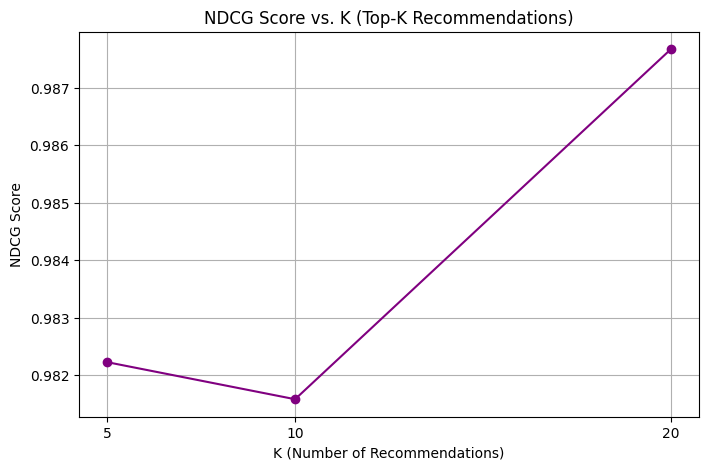

In [32]:
# --- 1. NDCG vs K Plot ---
ks = [5, 10, 20]
ndcg_vals = [metrics[f'NDCG@{k}'] for k in ks]

plt.figure(figsize=(8, 5))
plt.plot(ks, ndcg_vals, marker='o', linestyle='-', color='purple')
plt.title('NDCG Score vs. K (Top-K Recommendations)')
plt.xlabel('K (Number of Recommendations)')
plt.ylabel('NDCG Score')
plt.grid(True)
plt.xticks(ks)
plt.show()

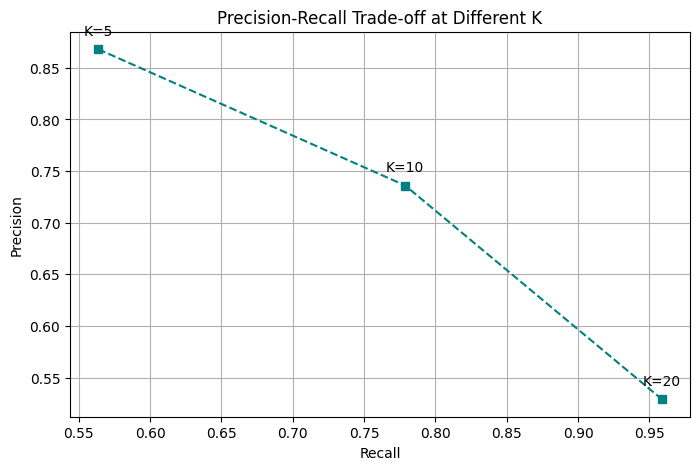

In [33]:
# --- 2. Precision-Recall Curve (Simulated for Recommendation) ---
# Evaluating trade-off at different K
ks = [5, 10, 20]
precisions = [metrics[f'Precision@{k}'] for k in ks]
recalls = [metrics[f'Recall@{k}'] for k in ks]

plt.figure(figsize=(8, 5))
plt.plot(recalls, precisions, marker='s', linestyle='--', color='teal')
plt.title('Precision-Recall Trade-off at Different K')
plt.xlabel('Recall')
plt.ylabel('Precision')
for i, k in enumerate(ks):
    plt.annotate(f'K={k}', (recalls[i], precisions[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.grid(True)
plt.show()

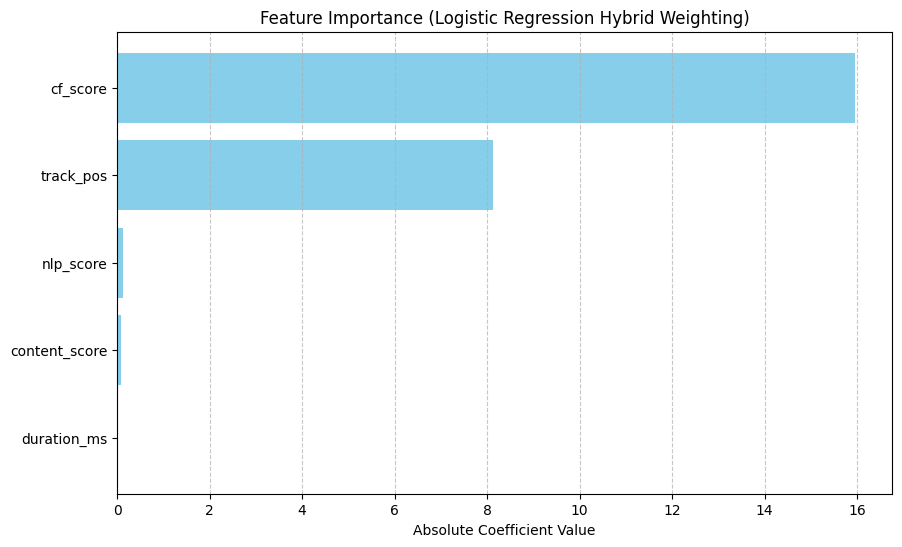

In [35]:
# --- 3. Feature Importance (Logistic Regression) ---
# Extract feature importance from the supervised model
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': np.abs(model.coef_[0])
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance (Logistic Regression Hybrid Weighting)')
plt.xlabel('Absolute Coefficient Value')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Conclusion
This notebook demonstrates a complete hybrid AI-based music playlist recommendation system combining content-based filtering, collaborative filtering, NLP, supervised learning, and hybrid fusion, aligned with academic AI module requirements.